In [207]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score 
import pandas as pd

In [208]:
df=pd.read_csv("dataset.csv",low_memory=False)

In [209]:
df

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,emtion
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,0
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,0
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,0
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,0
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,0
...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,5
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,5
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,5
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,5


In [210]:
target_dict=df.iloc[:,-1].value_counts(ascending=True)

<AxesSubplot:>

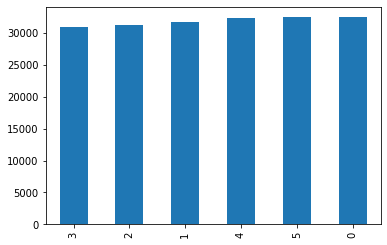

In [224]:
target_dict.plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

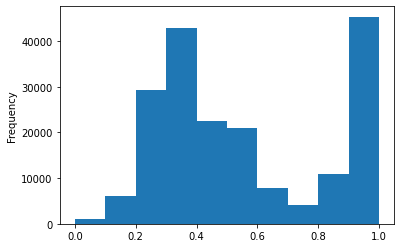

In [227]:
df.iloc[:,0].plot(kind="hist")

In [212]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [213]:
print(max(df.iloc[:,0]))

1.0


In [228]:
scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(X)

(190967,)


(array([9848., 9369., 7186., 6193., 5895.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

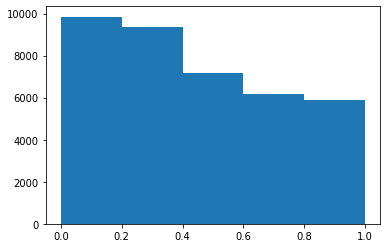

In [238]:
print(X_scale[:,0].shape)
plt.hist(X_scale[:,2], bins = [0,0.2,0.4,0.6,0.8,1]) 

In [215]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [216]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [217]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,tol=10**(-10),penalty="none")

In [218]:
model.fit(X_train,y_train)
acc_model_train=model.score(X_train,y_train)
acc_model_train

0.4941455751440042

In [183]:
model.fit(X_test,y_test)
acc_model=model.score(X_test,y_test)
acc_model

0.49347402044850563